In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.animation
import matplotlib.gridspec as gridspec
from datetime import timedelta

import seaborn as sns
from pprint import pprint

from skimage import feature

from SentinelHubUtils import get_eopatch, delete_frame_eopatch, band_names
from WaterMaskUtils import get_water_mask, visualise_water_mask

In [2]:
df = pd.read_csv('./data/01_removed_outliers/River_Arno.csv', sep=',', header=0, index_col=0)
df['Date'] = pd.to_datetime(df['Date']).dt.date
df = df.set_index('Date', verify_integrity=True)
df

,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
Date,,,,,,,,,,,,,,,,
1998-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1998-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
1998-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
1998-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
1998-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.34
2020-06-27,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.21
2020-06-28,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.30


# Sentinel Hub Images

In [3]:
river_Arno_dir_1 = './data/03_EO_River_Arno_1'

time_interval = ('2015-01-01', '2021-01-01')
geoPointBotLeft=(43.77184498529021, 11.09728515389569)
geoPointTopRight=(43.79947213547251, 11.142360769537667)

eopatch1 = get_eopatch(river_Arno_dir_1, (geoPointBotLeft, geoPointTopRight), time_interval)
eopatch1

eopatch data was loaded from local directory


EOPatch(
  data: {
    BANDS: numpy.ndarray(shape=(77, 316, 355, 7), dtype=float32)
    NDVI: numpy.ndarray(shape=(77, 316, 355, 1), dtype=float32)
    NDWI: numpy.ndarray(shape=(77, 316, 355, 1), dtype=float32)
  }
  mask: {
    CLM: numpy.ndarray(shape=(77, 316, 355, 1), dtype=uint8)
    CLP: numpy.ndarray(shape=(77, 316, 355, 1), dtype=uint8)
    IS_DATA: numpy.ndarray(shape=(77, 316, 355, 1), dtype=bool)
    VALID_DATA: numpy.ndarray(shape=(77, 316, 355, 1), dtype=bool)
  }
  scalar: {
    COVERAGE: numpy.ndarray(shape=(77, 1), dtype=float64)
  }
  label: {}
  vector: {}
  data_timeless: {}
  mask_timeless: {}
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {}
  meta_info: {
    maxcc: 0.1
    service_type: 'processing'
    size_x: 355
    size_y: 316
    time_difference: datetime.timedelta(days=1)
    time_interval: ('2015-01-01T00:00:00', '2021-01-01T23:59:59')
  }
  bbox: BBox(((11.09728515389569, 43.77184498529021), (11.142360769537667, 43.79947213547251)), crs=CR

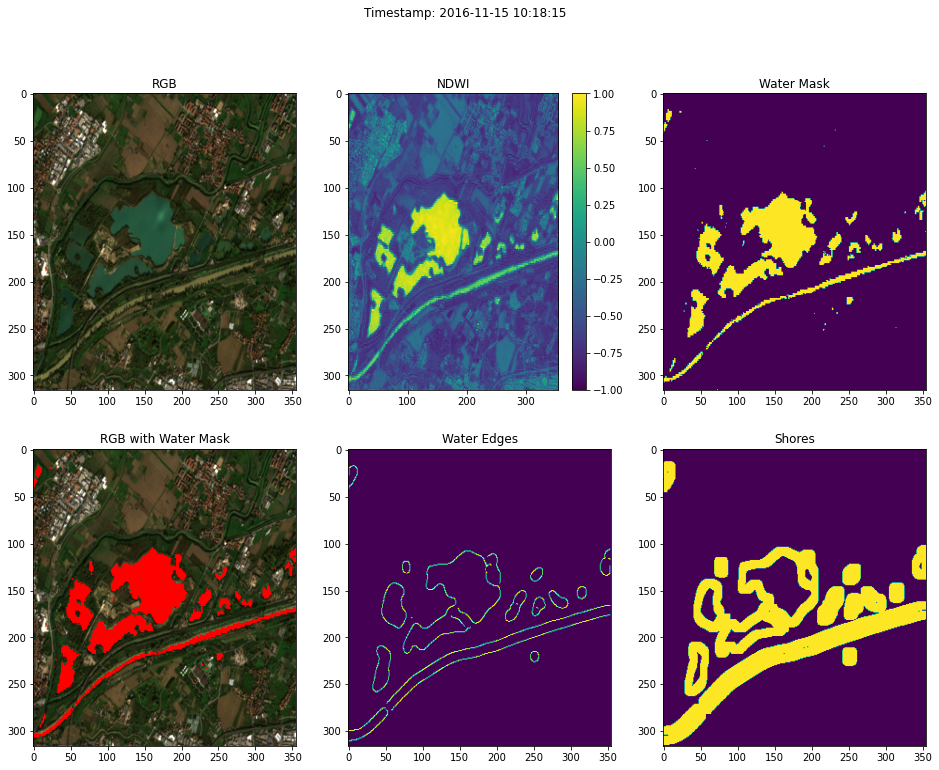

In [4]:
(water_mask1, water_edges1, shores1, shores_edges1) = get_water_mask(
    eopatch1,
    water_treshhold=0.4,
    canny_sigma=5,
    gauss_sigma=1
)

visualise_water_mask(band_names, eopatch1, 0, water_mask1, water_edges1, shores1, shores_edges1)

,NDWI,Hydrometry_Nave_di_Rosano
NDWI,1.000000,0.767615
Hydrometry_Nave_di_Rosano,0.767615,1.000000


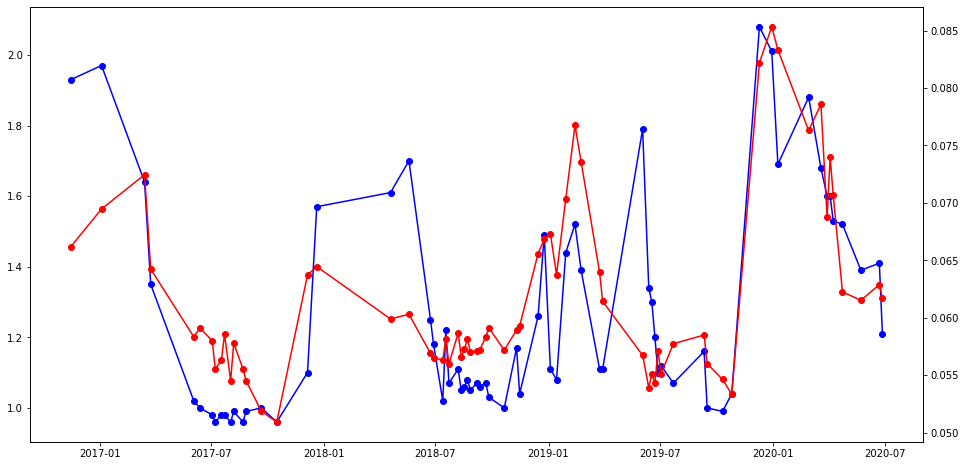

In [6]:
from WaterUtils import myNDWI_index

eo1 = myNDWI_index(eopatch1, shores1, -0.2)

eo1 = eo1.merge(df['Hydrometry_Nave_di_Rosano'], how='inner', left_index=True, right_index=True)

fig, ax = plt.subplots(1, 1, figsize=(16, 8))

ax.plot(eo1['Hydrometry_Nave_di_Rosano'], color='blue', linestyle='-', marker='o', label='River Level')
ax.twinx().plot(eo1['NDWI'], color='red', linestyle='-', marker='o', label='NDWI')

eo1.corr()